# REDES NEURONALES

---



En esta actividad vamos a utilizar una red neuronal para clasificar imágenes de prendas de ropa. Para ello, utilizaremos Keras con TensorFlow.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en [este enlace](https://github.com/zalandoresearch/fashion-mnist).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas celdas si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados**. Por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch.

In [1]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

En primer lugar vamos a importar el dataset Fashion MNIST (recordad que este es uno de los dataset de entranamiento que estan guardados en keras) que es el que vamos a utilizar en esta actividad:

In [2]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a **load_data** en este dataset nos dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen las prendas de vestir y sus etiquetas.

Nota: Aunque en esta actividad lo veis de esta forma, también lo vais a poder encontrar como 4 variables de esta forma: training_images, training_labels, test_images, test_labels = mnist.load_data()

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Antes de continuar vamos a dar un vistazo a nuestro dataset, para ello vamos a ver una imagen de entrenamiento y su etiqueta o clase.

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print(training_labels[0])
print(class_names[training_labels[0]])

9
Ankle boot


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

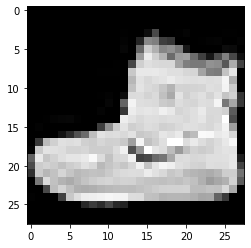

In [5]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro
#
print(training_labels[0])
print(training_images[0])

Habreis notado que todos los valores numericos están entre 0 y 255. Si estamos entrenando una red neuronal, una buena practica es transformar todos los valores entre 0 y 1, un proceso llamado "normalización" y afortunadamente en Python es fácil normalizar una lista. Lo puedes hacer de esta manera:

In [6]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

**Pregunta 1.1 *(0.25 puntos)*** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [7]:
### Tu código aquí ###
print(training_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


*Tu respuesta aquí:* 
<font color='green'>Hay 60.000 imágenes de entrenamiento y 10.000 imágenes de test. El tamaño de las imágenes es 28x28 </font>









<font color='orange'>Esta pregunta es muy sencilla, por tanto, para darla por buena tiene que indicarse los datos exactos para obtener la calificación </font>

**Pregunta 1.2 *(0.25 puntos)*** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

In [8]:
### Tu código aquí ###
print(training_labels[0])
print(training_images[0])

9
[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.  

*Tu respuesta aquí:*

<font color='green'>
Una imagen consiste en una matrix de 28x28 puntos donde cada uno de los puntos corresponde con un píxel e indica la intensidad del gris en ese píxel  </font>

<br>

<font color='green'>
La etiqueta consiste en un valor numérico entre 0 y 9 en el cual se indica que tipo de prenda de vestir representa la imagen a la que hace referencia. Además, como se puede ver en la siguente instrucción, en el caso de las imágenes de entrenamiento, están perfectamente balanceadas al haber 6.000 ejemplos de cada una de las clases. </font>

<font color='orange'>Simplemente con decir que cada instancia es una matrix (imagen) de 28x28 e indicar que en y tenemos 10 clases es suficiente </font>

In [9]:
(unique, counts) = np.unique(training_labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[   0, 6000],
       [   1, 6000],
       [   2, 6000],
       [   3, 6000],
       [   4, 6000],
       [   5, 6000],
       [   6, 6000],
       [   7, 6000],
       [   8, 6000],
       [   9, 6000]])

## 2. Creación del Modelo

Ahora vamos a definir el modelo, pero antes vamos a repasar algunos comandos y conceptos muy útiles:
* **Sequential**: Eso define una SECUENCIA de capas en la red neuronal
* **Dense**: Añade una capa de neuronas
* **Flatten**: ¿Recuerdas cómo eran las imágenes cuando las imprimiste para poder verlas? Un cuadrado, Flatten toma ese cuadrado y lo convierte en un vector de una dimensión.

Cada capa de neuronas necesita una función de activación. Normalmente se usa la función relu en las capas intermedias y softmax en la ultima capa (en problemas de clasificación de más de dos items)
* **Relu** significa que "Si X>0 devuelve X, si no, devuelve 0", así que lo que hace es pasar sólo valores 0 o mayores a la siguiente capa de la red.
* **Softmax** toma un conjunto de valores, y escoge el más grande.

 **Pregunta 2.1 (2 puntos)**. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Una hidden layer de tamaños 128 con funciones de activación sigmoid.
* Optimizador Adam.
* Durante el entrenamiento, la red tiene que mostrar resultados de loss y accuracy por cada epoch.
* La red debe entrenar durante 10 epochs y batch size de 64.
* La última capa debe de ser una capa softmax.
* Tu red tendría que ser capaz de superar fácilmente 80% de accuracy.

<font color='orange'>En este caso por cada error que se cometa quitar 0,5 puntos. Por ejemplo si tiene más de una hidden layer -0,5 puntos, si utiliza un optimizador distinto a Adam -0,5 puntos si entrena un número diferente de 10 epochs -0,5 puntos y así sucesivamente. En lo no especificado directamente puntuad siempre correctamente </font>

In [10]:
### Tu código para la red neuronal de la pregunta 2 aquí ###
nn = tf.keras.Sequential()                                #Como necesitamos una red neuronal de tres capas (una secuencia de tres capas) utilizamos la función ‘Sequential’ de Keras para crearla.
nn.add(tf.keras.layers.Flatten(input_shape=(28,28)))      #Ahora añadimos la capa inicial. #Como nuestro imput es una matriz, necesitamos pasarlo a un vector para que pueda ser procesado por la entrada de la red utilizando Flatten. #Cada píxel de la imágen es una entrada, al ser una red neuronal clásica #Con 'input_shape' le indicamos la forma de entrada 
nn.add(tf.keras.layers.Dense(128, activation='sigmoid'))  #Hidden layer de tamaño 128 y funcion de activación Sigmoid Añadimos una capa densamente conectada con la siguiente capa con Dense 
nn.add(tf.keras.layers.Dense(10, activation='softmax'))   #Ultima capa softmax, conviertiendo el vector de 10 en probabilidades de cada clase

In [11]:
#Para configurar el modelo utilizamos la función 'compile' 
#Activamos la métrica accuracy para ver la precisión del modelos #con 'metrics' y función de perdida "sparse_categorical_crossentropy"  #para dos o más clases
nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
nn.fit(training_images, training_labels, epochs=10)
#En mi caso, no he puesto datos de validación, pero podría hacerlo usando la siguiente instrucción:
#nn.fit(training_images, training_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5445 - accuracy: 0.8133
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3919 - accuracy: 0.8587
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3546 - accuracy: 0.8713
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3287 - accuracy: 0.8808
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3100 - accuracy: 0.8859
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2953 - accuracy: 0.8930
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2847 - accuracy: 0.8952
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2717 - accuracy: 0.9005
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2619 - accuracy: 0.9029
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.25

Para concluir el entrenamiento de la red neuronal, una buena practica es evaluar el modelo para ver si la precisión de entrenamiento es real

**pregunta 2.2 (0.5 puntos)**: evalua el modelo con las imagenes y etiquetas test.

In [13]:
### Tu código para la evaluación de la red neuronal de la pregunta 2 aquí ###
test_loss, test_accuracy = nn.evaluate(test_images,  test_labels, verbose=2)
print('Precisión del modelo:', test_accuracy)

313/313 - 1s - loss: 0.3314 - accuracy: 0.8821 - 533ms/epoch - 2ms/step
Precisión del modelo: 0.882099986076355


<font color='orange'>Esta pregunta está pensada para utilizar el método model.evaluate pero si se utiliza en el método .fit el parámetro validation_data y aqui se indican los valores de val_loss y val_accuracy lo podéis dar también por bueno. Además (y esto aplica en general) los resultados se deben dar por buenos a no ser que haya una diferencia importante con lo que se muestra aquí</font>

Ahora vamos a explorar el código con una serie de ejercicios para alcanzar un grado de comprensión mayor sobre las redes neuronales y su entrenamiento.

## 3: Funcionamiento de las predicción de la red neuronal

Sigue los siguientes pasos: 

* Crea una variable llamada **classifications** para construir un clasificador con las imágenes de prueba, para ello puedes utilizar la función predict sobre el conjunto de test
* Imprime con la función print la primera entrada en las clasificaciones. 

**pregunta 3.1 (0.25 puntos)**, el resultado al imprimirlo es un vector de números, 
* ¿Por qué crees que ocurre esto, y qué representa este vector de números?

**pregunta 3.2 (0.25 puntos)**
* ¿Cúal es la clase de la primera entrada de la variable **classifications**? La respuesta puede ser un número o su etiqueta/clase equivalente.

In [14]:
### Tu código del clasificador de la pregunta 3 aquí ###
clasificador = nn.predict(test_images)

In [15]:
clasificador

array([[2.10242001e-06, 3.37853692e-08, 2.36501961e-07, ..., 5.18648932e-03, 2.28917543e-05, 9.91182804e-01],
       [5.64415182e-04, 9.83779728e-07, 9.88079727e-01, ..., 1.48251445e-07, 2.41221642e-06, 1.49770571e-07],
       [4.75332272e-05, 9.99928474e-01, 4.82881887e-06, ..., 1.72153122e-07, 3.35186144e-07, 3.01512637e-09],
       ...,
       [6.94740156e-04, 7.49910782e-07, 1.72171945e-04, ..., 1.11937654e-04, 9.92907047e-01, 3.07409607e-07],
       [1.20858625e-04, 9.99064147e-01, 3.95081879e-05, ..., 3.52691882e-06, 2.95537598e-06, 2.23402822e-06],
       [2.84249126e-07, 1.09613921e-07, 1.09685720e-06, ..., 1.38420390e-03, 2.57376814e-05, 1.48692925e-06]], dtype=float32)

In [16]:
clasificador[0]

array([2.1024200e-06, 3.3785369e-08, 2.3650196e-07, 2.7066289e-08, 2.9963067e-07, 3.6026100e-03, 2.4376523e-06, 5.1864893e-03, 2.2891754e-05, 9.9118280e-01], dtype=float32)

Tu respuesta a la pregunta 3.1 aquí:

<font color='green'>
Este vector de números corresponde con la salida de la red neuronal. Hay 10 neuronas de salida y cada vector tiene 10 valores, uno con la salida de cada neurona. La capa de salida tiene una funcion de activación softmax. Esta funcion es muy usada en problemas de clasificación porque normaliza las salidas de las neuronas de la última capa en el sentido que convierte todos los valores de forma que la suma de todos ellos suma 1. De esta forma, la posicion del valor más alto corresponde con la salida del problema de clasificación y cuanto más alto sea más seguro está el modelo de la predicción.</font>

<font color='orange'>Hay que decir que la salida es un vector y para cada instancia clasificada hay 10 valores donde cada uno es una prenda de vestir (por eso hay 10 neuronas de salida) </font>

Tu respuesta a la pregunta 3.2 aquí:

In [17]:
print('Vector de salida de la primera entrada:', clasificador[0])
print('Valor más alto del vector', max(clasificador[0]))
print('Posición del valor más alto:', np.argmax(clasificador[0]))
print('Etiqueta de la imagen de la primera posición:', test_labels[0])
print('Nombre de la clase:', class_names[test_labels[0]])

Vector de salida de la primera entrada: [2.1024200e-06 3.3785369e-08 2.3650196e-07 2.7066289e-08 2.9963067e-07 3.6026100e-03 2.4376523e-06 5.1864893e-03 2.2891754e-05 9.9118280e-01]
Valor más alto del vector 0.9911828
Posición del valor más alto: 9
Etiqueta de la imagen de la primera posición: 9
Nombre de la clase: Ankle boot


<font color='orange'>Diciendo el nombre de la prenda vestir o la posición del valor más alto es suficiente </font>

# **4: Impacto variar el número de neuronas en las capas ocultas**

En este ejercicio vamos a experimentar con nuestra red neuronal cambiando el numero de neuronas por 512 y por 1024. Para ello, utiliza la red neuronal de la pregunta 1, y en su capa oculta cambia las 128 neuronas por:

* **512 neuronas en la capa oculta
* **1024 neuronas en la capa oculta

Entrena la red en ambos casos.



In [18]:
### Tu código para 512 neuronas aquí ###
nn512 = tf.keras.Sequential()                                
nn512.add(tf.keras.layers.Flatten(input_shape=(28,28)))      
nn512.add(tf.keras.layers.Dense(512, activation='sigmoid'))  
nn512.add(tf.keras.layers.Dense(10, activation='softmax'))   

nn512.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

nn512.fit(training_images, training_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5052 - accuracy: 0.8213
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3847 - accuracy: 0.8591
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3442 - accuracy: 0.8739
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3131 - accuracy: 0.8840
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2933 - accuracy: 0.8903
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2751 - accuracy: 0.8980
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2584 - accuracy: 0.9035
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2460 - accuracy: 0.9075
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2324 - accuracy: 0.9136
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.

In [19]:
### Tu código para 1024 neuronas aquí ###
nn1024 = tf.keras.Sequential()                                
nn1024.add(tf.keras.layers.Flatten(input_shape=(28,28)))      
nn1024.add(tf.keras.layers.Dense(1024, activation='sigmoid'))  
nn1024.add(tf.keras.layers.Dense(10, activation='softmax'))   

nn1024.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

nn1024.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5002 - accuracy: 0.8188
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3852 - accuracy: 0.8587
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3428 - accuracy: 0.8752
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3125 - accuracy: 0.8840
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2882 - accuracy: 0.8934
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2699 - accuracy: 0.8992
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2526 - accuracy: 0.9053
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2379 - accuracy: 0.9101
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2239 - accuracy: 0.9153
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - l

In [20]:
test_loss, test_accuracy = nn.evaluate(test_images,  test_labels, verbose=2)
print('Precisión del modelo:', test_accuracy)
test_loss512, test_accuracy512 = nn512.evaluate(test_images,  test_labels, verbose=2)
print('Precisión del modelo 512:', test_accuracy512)
test_loss1024, test_accuracy1024 = nn1024.evaluate(test_images,  test_labels, verbose=2)
print('Precisión del modelo 1024:', test_accuracy1024)

313/313 - 0s - loss: 0.3314 - accuracy: 0.8821 - 417ms/epoch - 1ms/step
Precisión del modelo: 0.882099986076355
313/313 - 1s - loss: 0.3154 - accuracy: 0.8888 - 785ms/epoch - 3ms/step
Precisión del modelo 512: 0.8888000249862671
313/313 - 1s - loss: 0.3479 - accuracy: 0.8759 - 1s/epoch - 3ms/step
Precisión del modelo 1024: 0.8758999705314636


**pregunta 4.1 (0.5 puntos)**: ¿Cual es el impacto que tiene la red neuronal? 

Tu respuesta a la pregunta 4.1 aquí: <font color='green'> Se puede decir que el impacto es prácticamente nulo </font>

<font color='orange'>Esta es la respuesta correcta y hay que indicarlo. En el caso que diga una respuesta diferente verificar si veis algún error en el código con respecto al que pongo de ejemplo, en ese caso quitar solo la mitad de la puntuación </font>

Después de entrenar el modelo de esta forma (con 512 y 1024 neuronas en la capa oculta) volvéis a ejecutar el predictor guardado en la variable **classifications**, escribir el código del clasificador del ejercicio 1 de nuevo e imprimid el primer objeto guardado en la variable classifications.

**pregunta 4.2 (0.25 puntos)**: 

* ¿En qué clase esta clasificado ahora la primera prenda de vestir de la variable classifications?

**pregunta 4.3 (0.25 puntos)**: 

* ¿Por qué crees que ha ocurrido esto?

In [21]:
### Tu código del clasificador de la pregunta 4 aquí ###

In [22]:
clasificador512 = nn512.predict(test_images)
clasificador1024 = nn1024.predict(test_images)

print('Vector de salida de la primera entrada del clasificador 512:', clasificador512[0])
print('Vector de salida de la primera entrada del clasificador 1024:', clasificador512[0])

print('Valor más alto del vector del clasificador 512:', max(clasificador512[0]))
print('Valor más alto del vector del clasificador 1024:', max(clasificador512[0]))

print('Posición del valor más alto del clasificador 512:', np.argmax(clasificador512[0]))
print('Posición del valor más alto del clasificador 1024:', np.argmax(clasificador512[0]))

Vector de salida de la primera entrada del clasificador 512: [4.4149633e-07 7.5379463e-09 3.6636550e-08 1.5627496e-08 1.0718942e-07 1.1770598e-03 3.3735293e-07 7.4629560e-03 3.4592131e-07 9.9135876e-01]
Vector de salida de la primera entrada del clasificador 1024: [4.4149633e-07 7.5379463e-09 3.6636550e-08 1.5627496e-08 1.0718942e-07 1.1770598e-03 3.3735293e-07 7.4629560e-03 3.4592131e-07 9.9135876e-01]
Valor más alto del vector del clasificador 512: 0.99135876
Valor más alto del vector del clasificador 1024: 0.99135876
Posición del valor más alto del clasificador 512: 9
Posición del valor más alto del clasificador 1024: 9


Tu respuesta a la pregunta 4.2 aquí:

<font color='green'>Predice la clase 9 en ambos casos, exactamente igual que el modelo anterior con 128 neuronas. </font>

<font color='orange'>Tiene que verse en la respuesta que la clasificación coincide en ámbos modelos </font>

Tu respuesta a la pregunta 4.3 aquí:

<font color='green'>Esto nos quiere decir que tener un menor número de neuronas no tiene por qué significar siempre peor precisión (y viceversa).</font>

<font color='orange'>Cualquier respuesta similar a esta en la que se ponga de manifiesto que a veces no por más neuronas se consigue mejor resultado es válida </font>

# **5: Capa Flatten**

En este ejercicio vamos a ver que ocurre cuando quitamos la capa flatten, para ello, escribe la red neuronal de la pregunta 1 y no pongas la capa Flatten.

**pregunta 5 (0.5 puntos):** ¿Puedes explicar por qué da el error que da?



In [23]:
### Tu código de la red neuronal sin capa flatten de la pregunta 6 aquí ###
nn_no_flatten = tf.keras.Sequential()                                
nn_no_flatten.add(tf.keras.layers.Dense(128, activation='sigmoid',input_shape=(28,28)))  
nn_no_flatten.add(tf.keras.layers.Dense(10, activation='softmax'))   

nn_no_flatten.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

nn_no_flatten.fit(training_images, training_labels, epochs=10)

Epoch 1/10


ValueError: ignored

Tu respuesta a la pregunta 5 aquí:

<font color='green'>Esto se debe al formato de las muestras de entrenamiento. En este caso son matrices de 28x28, para entrenar la red necesitamos pasar la matriz a un vector. Cada pixel tiene que ser una entrada a la red. Flatten es el que se encarga de convertir la matriz en un vector.</font>

<font color='orange'>Con decir que entra una matriz de dos simensiones en lugar de un vector es suficiente </font>

# **6: Número de neuronas de la capa de salida**
Considerad la capa final, la de salida de la red neuronal de la pregunta 1.

**pregunta 6.1 (0.25 puntos)**: ¿Por qué son 10 las neuronas de la última capa?

**pregunta 6.2 (0.25 puntos)**: ¿Qué pasaría si tuvieras una cantidad diferente a 10? 

Por ejemplo, intenta entrenar la red con 5, para ello utiliza la red neuronal de la pregunta 1 y cambia a 5 el número de neuronas en la última capa.

In [25]:
### Tu código de la red neuronal con 5 neuronas en la capa de salida de la pregunta 7 aquí ###
nn = tf.keras.Sequential()                                
nn.add(tf.keras.layers.Flatten(input_shape=(28,28)))      
nn.add(tf.keras.layers.Dense(128, activation='sigmoid')) 
nn.add(tf.keras.layers.Dense(5, activation='softmax'))
nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
nn.fit(training_images, training_labels, epochs=10)


Epoch 1/10


InvalidArgumentError: ignored

Tu respuestas a la pregunta 6.1 aquí:

<font color='green'> La salida son 10 neuronas porque hay exactamente 10 clases diferentes, en este caso prendas de vestir, que tenemos que clasifiar.  </font>

<font color='orange'>Hay que indicar que son 10 neuronas por las 10 prendas de ropa</font>

Tu respuestas a la pregunta 6.2 aquí:

<font color='green'> La red neuronal maneja instancias cuya etiqueta (label) está comprendida en el rango 0-9 sin embargo el rango válido es 0-5 ya que solo hay 5 neuronas de salida y por tanto, no es válido. </font>

<font color='orange'>Es necesario explicar esto tal cual se dice aqui (o similar pero con el mismo sentido) </font>

# 7: Aumento de epoch y su efecto en la red neuronal
En este ejercicio vamos a ver el impacto de aumentar los epoch en el entrenamiento. Usando la red neuronal de la pregunta 1:

**pregunta 7.1 (0.15 puntos)**
* Intentad 15 epoch para su entrenamiento, probablemente obtendras un modelo con una pérdida mucho mejor que el que tiene 5.

**pregunta 7.2 (0.15 puntos)**
* Intenta ahora con 30 epoch para su entrenamiento, podrás ver que el valor de la pérdida deja de disminuir, y a veces aumenta.

**pregunta 7.3 (0.30 puntos)**
* ¿Porque que piensas que ocurre esto? Explica tu respuesta y da el nombre de este efecto si lo conoces.

In [26]:
### Tu código para 15 epoch aquí ###
nn15 = tf.keras.Sequential()                                
nn15.add(tf.keras.layers.Flatten(input_shape=(28,28)))      
nn15.add(tf.keras.layers.Dense(128, activation='sigmoid'))  
nn15.add(tf.keras.layers.Dense(10, activation='softmax'))   

nn15.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

h15=nn15.fit(training_images, training_labels, epochs=15, validation_data=(test_images, test_labels))

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5400 - accuracy: 0.8173 - val_loss: 0.4383 - val_accuracy: 0.8437
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3910 - accuracy: 0.8594 - val_loss: 0.4106 - val_accuracy: 0.8492
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3535 - accuracy: 0.8730 - val_loss: 0.3819 - val_accuracy: 0.8636
Epoch 4/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3306 - accuracy: 0.8807 - val_loss: 0.3667 - val_accuracy: 0.8686
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3099 - accuracy: 0.8873 - val_loss: 0.3550 - val_accuracy: 0.8716
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2951 - accuracy: 0.8925 - val_loss: 0.3475 - val_accuracy: 0.8747
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2825 - accuracy: 0.8967 - val_loss: 0.3483 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


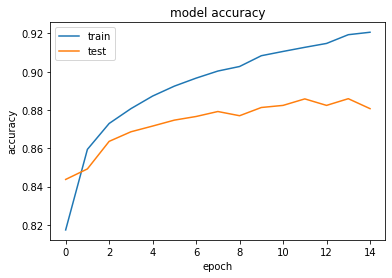

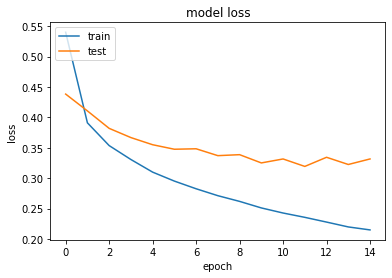

In [27]:
# list all data in history
print(h15.history.keys())
# summarize history for accuracy
plt.plot(h15.history['accuracy'])
plt.plot(h15.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(h15.history['loss'])
plt.plot(h15.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
### Tu código para 30 epoch aquí ###
nn30 = tf.keras.Sequential()                                
nn30.add(tf.keras.layers.Flatten(input_shape=(28,28)))      
nn30.add(tf.keras.layers.Dense(128, activation='sigmoid'))  
nn30.add(tf.keras.layers.Dense(10, activation='softmax'))   

nn30.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

h30=nn30.fit(training_images, training_labels, epochs=30, validation_data=(test_images, test_labels))

Epoch 1/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5488 - accuracy: 0.8118 - val_loss: 0.4501 - val_accuracy: 0.8364
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3935 - accuracy: 0.8572 - val_loss: 0.4249 - val_accuracy: 0.8449
Epoch 3/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3560 - accuracy: 0.8705 - val_loss: 0.3847 - val_accuracy: 0.8566
Epoch 4/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3303 - accuracy: 0.8795 - val_loss: 0.3818 - val_accuracy: 0.8617
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3109 - accuracy: 0.8868 - val_loss: 0.3535 - val_accuracy: 0.8749
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2956 - accuracy: 0.8913 - val_loss: 0.3612 - val_accuracy: 0.8700
Epoch 7/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2821 - accuracy: 0.8958 - val_loss: 0.3538 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


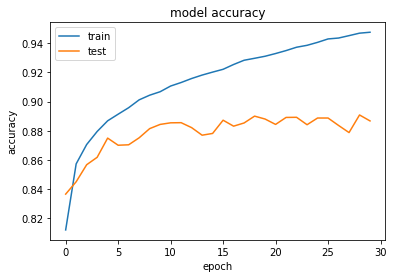

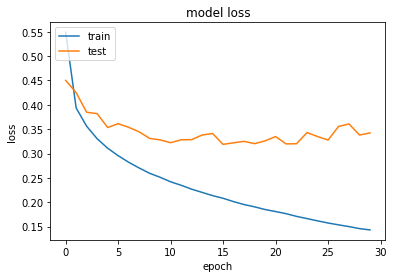

In [29]:
# list all data in history
print(h30.history.keys())
# summarize history for accuracy
plt.plot(h30.history['accuracy'])
plt.plot(h30.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(h30.history['loss'])
plt.plot(h30.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Tu respuesta a la pregunta 7.3 aquí:

<font color='green'>
Se puede observar claramente como en ambos casos el loss con los datos de entrenamiento sigue descendiendo siempre, sin embargo, hay un momento en el que el loss de los datos de test se queda fijo o va oscilando haciendo picos sin llegar a descender. Esto indica, que el modelo empieza a sufrir de overfitting. 
</font>

<font color='orange'>En 7.1 y 7.2 hay que comprobar que el código está bien. En 7.3 hay que ver que el modelo ha llegado a un punto en el que empieza a haber overfitting </font>

# 8: Early stop
En el ejercicio anterior, cuando entrenabas con epoch extras, tenías un problema en el que tu pérdida podía cambiar. Además, has visto como las epochs extra consumían ucho tiempo y sin embargo, no había ninguna mejora. Puede que hayas pensado "¿No estaría bien si pudiera parar el entrenamiento cuando alcance un valor deseado?". Por ejemplo, una precisión del 85% podría ser suficiente para ti, y si alcanzas eso después de 3 epoch, ¿Por qué seguir esperando a que terminen muchas más épocas? Existen formas de parar la ejecución. A partir del código de ejemplo, hacer una nueva función que tenga en cuenta la perdida (loss) para parar la ejecución.

In [30]:
### Ejemplo de código

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')> 0.85):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True

**Ejercicio 8 *(0.75 puntos)***: Completa el siguiente código con una clase callback que una vez alcanzado el 40% de perdida detenga el entrenamiento.

In [31]:
import tensorflow as tf
print(tf.__version__)

### Tu código de la función callback para parar el entrenamiento de la red neuronal al 40% de loss aqui: ###
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')< 0.4):
              print("\nAlcanzada una loss <0.4, se cancela el entrenamiento!!")
              self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) 

model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])

2.8.0
Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4977 - accuracy: 0.8254
Epoch 2/50
1864/1875 [============================>.] - ETA: 0s - loss: 0.3791 - accuracy: 0.8639
Alcanzada una loss <0.4, se cancela el entrenamiento!!
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3790 - accuracy: 0.8638


<font color='green'> Como se puede ver tras la segunda iteración se alcanza el objetivo de loss y se para el entrenamiento </font>

<font color='orange'> Hay que ver si el código está bien, con respecto a la respuesta que se indica aquí. Si tiene un ligero fallo, por ejemplo, no se pone el signo comparador correcto pero el número sí, o el número se pone bien pero la métrica es la incorrecta quitar solo la mitad de la pregunta </font>

# 9. Unidades de activación

<font color='orange'> De aquí en adelante hay que tener en cuenta que no siempre pueden salir los mismos resultados y que hay mucha variabilidad en función del entorno de ejecución que utilice cada uno. Por tanto, tenéis que comprobar en primer lugar que el código está bien y que se hace lo que se pide el ejercicio. <br><br>En este ejercicio se debe entrenar un modelo con sigmoid y otro con relu como mínimo. <br><br>Cualquier respuesta se toma como buena siempre que esté soportada por las métricas de evaluación de los modelos construidos, en caso contrario por cada error de código o interpretación quitar un tercio del valor de la pregunta. Si no se dibujan gráficas no pasa nada, en el caso que se dibujen gráficas perdonar el primer error detectado en el caso de que haya y no restar el tercio del valor de la pregunta. </font>

En este ejercicio, vamos a evaluar la importancia de utilizar las unidades de activación adecuadas. Como hemos visto en clase, funciones de activación como sigmoid han dejado de utilizarse en favor de otras unidades como ReLU.

**Ejercicio 9 *(0.75 puntos)***: Partiendo de una red sencilla como la desarrollada en el Trabajo 1, escribir un breve análisis comparando la utilización de unidades sigmoid y ReLU (por ejemplo, se pueden comentar aspectos como velocidad de convergencia, métricas obtenidas...). Explicar por qué pueden darse estas diferencias. Opcionalmente, comparar con otras activaciones disponibles en Keras.

*Pista: Usando redes más grandes se hace más sencillo apreciar las diferencias. Es mejor utilizar al menos 3 o 4 capas densas.*

In [32]:
## Tu código con funciones de activación sigmoid en la capa oculta

nn = tf.keras.Sequential()                                
nn.add(tf.keras.layers.Flatten(input_shape=(28,28)))      
nn.add(tf.keras.layers.Dense(512, activation='sigmoid')) 
nn.add(tf.keras.layers.Dense(1024, activation='sigmoid')) 
nn.add(tf.keras.layers.Dense(512, activation='sigmoid')) 
nn.add(tf.keras.layers.Dense(10, activation='softmax'))
nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history_sigmoid = nn.fit(training_images, training_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.5596 - accuracy: 0.7933 - val_loss: 0.4550 - val_accuracy: 0.8369
Epoch 2/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.3896 - accuracy: 0.8564 - val_loss: 0.4167 - val_accuracy: 0.8477
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.3465 - accuracy: 0.8727 - val_loss: 0.3838 - val_accuracy: 0.8603
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.3186 - accuracy: 0.8814 - val_loss: 0.3531 - val_accuracy: 0.8707
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2976 - accuracy: 0.8897 - val_loss: 0.3353 - val_accuracy: 0.8760
Epoch 6/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2794 - accuracy: 0.8951 - val_loss: 0.3749 - val_accuracy: 0.8643
Epoch 7/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.2641 - accuracy: 0.9005 - val_loss: 0.3351 -

In [33]:
## Tu código con funciones de activación relu en la capa oculta
nn = tf.keras.Sequential()                                
nn.add(tf.keras.layers.Flatten(input_shape=(28,28)))      
nn.add(tf.keras.layers.Dense(512, activation='relu')) 
nn.add(tf.keras.layers.Dense(1024, activation='relu')) 
nn.add(tf.keras.layers.Dense(512, activation='relu')) 
nn.add(tf.keras.layers.Dense(10, activation='softmax'))
nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history_relu = nn.fit(training_images, training_labels, epochs=10 , validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.4768 - accuracy: 0.8281 - val_loss: 0.5108 - val_accuracy: 0.8275
Epoch 2/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.3703 - accuracy: 0.8648 - val_loss: 0.3843 - val_accuracy: 0.8594
Epoch 3/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.3289 - accuracy: 0.8802 - val_loss: 0.4219 - val_accuracy: 0.8596
Epoch 4/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.3087 - accuracy: 0.8863 - val_loss: 0.3562 - val_accuracy: 0.8696
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2884 - accuracy: 0.8939 - val_loss: 0.3529 - val_accuracy: 0.8756
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2727 - accuracy: 0.8972 - val_loss: 0.3349 - val_accuracy: 0.8792
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2650 - accuracy: 0.9003 - val_loss: 0.3434 -

In [34]:
def plot_compare_losses(history1, history2, name1="Red 1",
                        name2="Red 2", title="Graph title"):
    """Compara losses de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['loss'], color="green")
    plt.plot(history1.history['val_loss'], 'r--', color="green")
    plt.plot(history2.history['loss'], color="blue")
    plt.plot(history2.history['val_loss'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2],
               loc='upper right')
    plt.show()
    
def plot_compare_accs(history1, history2, name1="Red 1",
                      name2="Red 2", title="Graph title"):
    """Compara accuracies de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['accuracy'], color="green")
    plt.plot(history1.history['val_accuracy'], 'r--', color="green")
    plt.plot(history2.history['accuracy'], color="blue")
    plt.plot(history2.history['val_accuracy'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2], 
               loc='lower right')
    plt.show()

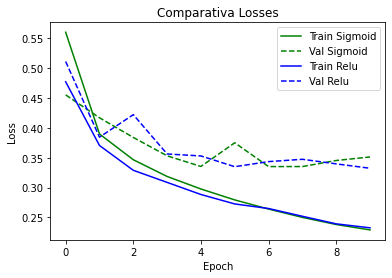

In [35]:
plot_compare_losses(history_sigmoid, history_relu, "Sigmoid", "Relu", "Comparativa Losses")

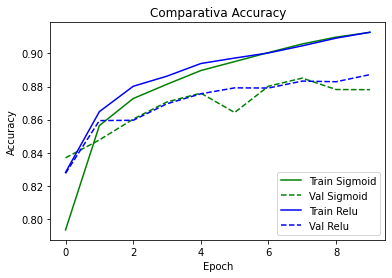

In [36]:
plot_compare_accs(history_sigmoid, history_relu, "Sigmoid", "Relu", "Comparativa Accuracy")

<font color='green'> Aunque los comportamientos son muy similares la Función de Activación Relu tiende a converger de forma algo más rápida. 

# 10. Inicialización de parámetros

En este ejercicio, vamos a evaluar la importancia de una correcta inicialización de parámetros en una red neuronal.

**Ejercicio 10 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (usando ya ReLUs), comentar las diferencias que se aprecian en el entrenamiento al utilizar distintas estrategias de inicialización de parámetros. Para ello, inicializar todas las capas con las siguientes estrategias, disponibles en Keras, y analizar sus diferencias:

* Inicialización con ceros.
* Inicialización con una variable aleatoria normal.
* Inicialización con los valores por defecto de Keras para una capa Dense (estrategia *glorot uniform*)

<font color='orange'> De aquí en adelante hay que tener en cuenta que no siempre pueden salir los mismos resultados y que hay mucha variabilidad en función del entorno de ejecución que utilice cada uno. Por tanto, tenéis que comprobar en primer lugar que el código está bien y que se hace lo que se pide el ejercicio. </font><br><br>
<font color='orange'>
En este ejercicio se debe entrenar un modelo inicializando a ceros, con una variable aleatorio normal y con la estrategia glorot uniform. </font><br><br>
<font color='orange'>
Cualquier respuesta se toma como buena siempre que esté soportada por las métricas de evaluación de los modelos construidos, en caso contrario por cada error de código o interpretación quitar un tercio del valor de la pregunta. Si no se dibujan gráficas no pasa nada, en el caso que se dibujen gráficas perdonar el primer error detectado en el caso de que haya y no restar el tercio del valor de la pregunta. </font>

In [37]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto
from keras import initializers


In [38]:
## Inicialización con ceros
nn = tf.keras.Sequential()                                
nn.add(tf.keras.layers.Flatten(input_shape=(28,28)))      
nn.add(tf.keras.layers.Dense(512, activation='relu',kernel_initializer=initializers.Constant(0.))) 
nn.add(tf.keras.layers.Dense(10, activation='softmax'))
nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history_ceros = nn.fit(training_images, training_labels, epochs=10 , validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3028 - accuracy: 0.0969 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 2.3028 - accuracy: 0.0998 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3028 - accuracy: 0.0964 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3028 - accuracy: 0.1000 - val_loss: 2.3026 - val_ac

In [39]:
nn = tf.keras.Sequential()                                
nn.add(tf.keras.layers.Flatten(input_shape=(28,28)))      
nn.add(tf.keras.layers.Dense(512, activation='relu', kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None))) 
nn.add(tf.keras.layers.Dense(10, activation='softmax'))
nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history_randonNormal = nn.fit(training_images, training_labels, epochs=10 , validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4825 - accuracy: 0.8270 - val_loss: 0.4405 - val_accuracy: 0.8391
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3639 - accuracy: 0.8668 - val_loss: 0.4021 - val_accuracy: 0.8541
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3284 - accuracy: 0.8787 - val_loss: 0.3504 - val_accuracy: 0.8738
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3028 - accuracy: 0.8881 - val_loss: 0.3684 - val_accuracy: 0.8686
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2828 - accuracy: 0.8960 - val_loss: 0.3399 - val_accuracy: 0.8748
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2698 - accuracy: 0.8993 - val_loss: 0.3492 - val_accuracy: 0.8783
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2566 - accuracy: 0.9051 - val_loss: 0.3296 - val_acc

In [40]:
nn = tf.keras.Sequential()                                
nn.add(tf.keras.layers.Flatten(input_shape=(28,28)))      
nn.add(tf.keras.layers.Dense(512, activation='relu', kernel_initializer=initializers.glorot_uniform())) 
nn.add(tf.keras.layers.Dense(10, activation='softmax'))
nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history_glorotUniform = nn.fit(training_images, training_labels, epochs=10 , validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4770 - accuracy: 0.8301 - val_loss: 0.4086 - val_accuracy: 0.8568
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3621 - accuracy: 0.8673 - val_loss: 0.3740 - val_accuracy: 0.8634
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3234 - accuracy: 0.8813 - val_loss: 0.3532 - val_accuracy: 0.8736
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2975 - accuracy: 0.8889 - val_loss: 0.3658 - val_accuracy: 0.8715
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2815 - accuracy: 0.8952 - val_loss: 0.3405 - val_accuracy: 0.8782
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2632 - accuracy: 0.9017 - val_loss: 0.3591 - val_accuracy: 0.8669
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2511 - accuracy: 0.9075 - val_loss: 0.3250 - val_acc

In [41]:
 
def plot_compare_losses3(history1, history2, history3,
                        name1="Red 1", name2="Red 2", name3="Red 3",
                        title="Graph title"):
  
    """Compara losses de 3 entrenamientos"""
    plt.plot(history1.history['loss'], color="green")
    plt.plot(history1.history['val_loss'], 'r--', color="green")

    plt.plot(history2.history['loss'], color="blue")
    plt.plot(history2.history['val_loss'], 'r--', color="blue")

    plt.plot(history3.history['loss'], color="red")
    plt.plot(history3.history['val_loss'], 'r--', color="red")

    
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2,  
                'Train ' + name3, 'Val ' + name3],
               loc='upper right')
    plt.show()


def plot_compare_accs3(history1, history2, history3, 
                       name1="Red 1", name2="Red 2", name3="Red 3", 
                       title="Graph title"):
    """Compara accuracies de 3 entrenamientos"""
    plt.plot(history1.history['accuracy'], color="green")
    plt.plot(history1.history['val_accuracy'], 'r--', color="green")
    plt.plot(history2.history['accuracy'], color="blue")
    plt.plot(history2.history['val_accuracy'], 'r--', color="blue")
    plt.plot(history3.history['accuracy'], color="red")
    plt.plot(history3.history['val_accuracy'], 'r--', color="red")

    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2, 
                'Train ' + name3, 'Val ' + name3], 
               loc='lower right')
    plt.show()

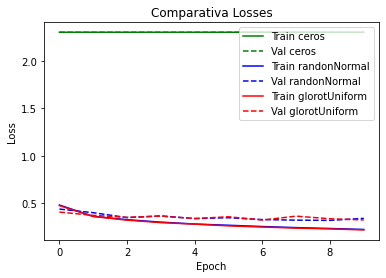

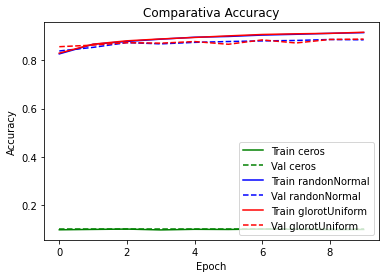

In [42]:
plot_compare_losses3(history_ceros, history_randonNormal, history_glorotUniform, "ceros", "randonNormal", "glorotUniform", "Comparativa Losses")
plot_compare_accs3(history_ceros, history_randonNormal, history_glorotUniform, "ceros", "randonNormal", "glorotUniform", "Comparativa Accuracy")

<font color='green'> Se puede ver de forma clara como hay muy poca variacion entre una inicialización con una variable aleatoria normal y siguiendo la estrategia glorot uniform. Sin embargo, la inicializacion de todo a ceros no es válida, pues como se observa es incapaz de aprender. De hecho el accuracy que arroja es 10%, que coincide exactamente que el porcentaje de instancias de cada clase que existe ya que el dataset está completamente balanceado y hay 10 clases distintas. </font>

# 11. Optimizadores

**Ejercicio 11 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (utilizando la mejor estrategia de inicialización observada), comparar y analizar las diferencias que se observan  al entrenar con varios de los optimizadores vistos en clase, incluyendo SGD como optimizador básico (se puede explorar el espacio de hiperparámetros de cada optimizador, aunque para optimizadores más avanzados del estilo de adam y RMSprop es buena idea dejar los valores por defecto provistos por Keras).

<font color='orange'> De aquí en adelante hay que tener en cuenta que no siempre pueden salir los mismos resultados y que hay mucha variabilidad en función del entorno de ejecución que utilice cada uno. Por tanto, tenéis que comprobar en primer lugar que el código está bien y que se hace lo que se pide el ejercicio.  <br><br> En este ejercicio se deben entrenar al menos 3 modelos con algunos de los optimizadores como sgd, adam, adagrad o rmsprop. <br><br> Cualquier respuesta se toma como buena siempre que esté soportada por las métricas de evaluación de los modelos construidos, en caso contrario por cada error de código o interpretación quitar un tercio del valor de la pregunta. Si no se dibujan gráficas no pasa nada, en el caso que se dibujen gráficas perdonar el primer error detectado en el caso de que haya y no restar el tercio del valor de la pregunta. </font>

In [43]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto

In [44]:
#sgd
nn = tf.keras.Sequential()                                
nn.add(tf.keras.layers.Flatten(input_shape=(28,28)))      
nn.add(tf.keras.layers.Dense(512, activation='relu')) 
nn.add(tf.keras.layers.Dense(10, activation='softmax'))
nn.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history_sgd = nn.fit(training_images, training_labels, epochs=10 , validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.7049 - accuracy: 0.7731 - val_loss: 0.5786 - val_accuracy: 0.7970
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5003 - accuracy: 0.8311 - val_loss: 0.4958 - val_accuracy: 0.8278
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4570 - accuracy: 0.8435 - val_loss: 0.4758 - val_accuracy: 0.8333
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4330 - accuracy: 0.8513 - val_loss: 0.4639 - val_accuracy: 0.8372
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4148 - accuracy: 0.8576 - val_loss: 0.4375 - val_accuracy: 0.8454
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4004 - accuracy: 0.8611 - val_loss: 0.4330 - val_accuracy: 0.8470
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3893 - accuracy: 0.8657 - val_loss: 0.4230 - val_accuracy:

In [45]:
#rmsprop
nn = tf.keras.Sequential()                                
nn.add(tf.keras.layers.Flatten(input_shape=(28,28)))      
nn.add(tf.keras.layers.Dense(512, activation='relu')) 
nn.add(tf.keras.layers.Dense(10, activation='softmax'))
nn.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history_rmsprop = nn.fit(training_images, training_labels, epochs=10 , validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4972 - accuracy: 0.8230 - val_loss: 0.4080 - val_accuracy: 0.8578
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3787 - accuracy: 0.8652 - val_loss: 0.4448 - val_accuracy: 0.8422
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3523 - accuracy: 0.8774 - val_loss: 0.4070 - val_accuracy: 0.8671
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3382 - accuracy: 0.8848 - val_loss: 0.4474 - val_accuracy: 0.8608
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3298 - accuracy: 0.8880 - val_loss: 0.4492 - val_accuracy: 0.8572
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3218 - accuracy: 0.8929 - val_loss: 0.5023 - val_accuracy: 0.8533
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3162 - accuracy: 0.8954 - val_loss: 0.4429 - val_ac

In [46]:
#adam
nn = tf.keras.Sequential()                                
nn.add(tf.keras.layers.Flatten(input_shape=(28,28)))      
nn.add(tf.keras.layers.Dense(512, activation='relu')) 
nn.add(tf.keras.layers.Dense(10, activation='softmax'))
nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history_adam = nn.fit(training_images, training_labels, epochs=10 , validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4714 - accuracy: 0.8313 - val_loss: 0.3935 - val_accuracy: 0.8571
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3569 - accuracy: 0.8685 - val_loss: 0.4213 - val_accuracy: 0.8398
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3223 - accuracy: 0.8805 - val_loss: 0.3421 - val_accuracy: 0.8749
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2957 - accuracy: 0.8901 - val_loss: 0.3477 - val_accuracy: 0.8746
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2789 - accuracy: 0.8975 - val_loss: 0.3655 - val_accuracy: 0.8641
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2655 - accuracy: 0.9019 - val_loss: 0.3434 - val_accuracy: 0.8791
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2543 - accuracy: 0.9045 - val_loss: 0.3459 - val_accur

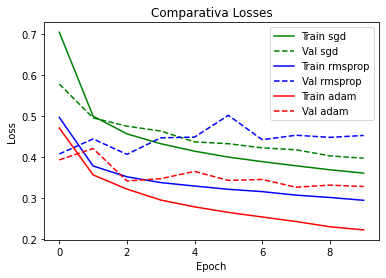

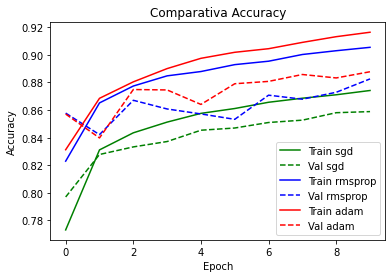

In [47]:
plot_compare_losses3(history_sgd, history_rmsprop, history_adam, "sgd", "rmsprop", "adam", "Comparativa Losses")
plot_compare_accs3(history_sgd, history_rmsprop, history_adam, "sgd", "rmsprop", "adam", "Comparativa Accuracy")

<font color='green'> Se puede ver como en general, los métodos rmsprop y adam, que trabajan con un learning rate adaptativo, funcionan algo mejor que el sgd. </font>

# 12. Regularización y red final *(1.25 puntos)*

**Ejercicio 12 *(1 punto)***: Entrenar una red final que sea capaz de obtener una accuracy en el validation set cercana al 90%. Para ello, combinar todo lo aprendido anteriormente y utilizar técnicas de regularización para evitar overfitting. Algunos de los elementos que pueden tenerse en cuenta son los siguientes.

* Número de capas y neuronas por capa
* Optimizadores y sus parámetros
* Batch size
* Unidades de activación
* Uso de capas dropout, regularización L2, regularización L1...
* Early stopping (se puede aplicar como un callback de Keras, o se puede ver un poco "a ojo" cuándo el modelo empieza a caer en overfitting y seleccionar el número de epochs necesarias)
* Batch normalization

Si los modelos entrenados anteriormente ya se acercaban al valor requerido de accuracy, probar distintas estrategias igualmente y comentar los resultados.

Explicar brevemente la estrategia seguida y los modelos probados para obtener el modelo final, que debe verse entrenado en este Notebook. No es necesario guardar el entrenamiento de todos los modelos que se han probado, es suficiente con explicar cómo se ha llegado al modelo final.

<font color='orange'> Este ejercicio es totalmente libre. Cualquier resultado que llegue al 89% recibe la máxima puntuación. Si sobrepasa el 88.5% sin llegar al 89% la mitad de la puntuación. <br><br>
Hay que fijarse bien que la métrica que estamos comparando y que tiene que llegar al valor indicado es el accuracy con los datos de validación (val_accuracy) y no el accuracy con los datos de entrenamiento (accuracy)</font>

In [48]:
## Tu modelo y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto


In [56]:
class myCallbackFinal(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')> 0.89):
              print("\nAlcanzado el 89% de precisión en datos de test, se cancela el entrenamiento!!")
              self.model.stop_training = True

callbackFinal = myCallbackFinal()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(150, activation='elu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_final = model.fit(training_images, training_labels, epochs=20, validation_data=(test_images, test_labels), callbacks=[callbackFinal])

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4873 - accuracy: 0.8265 - val_loss: 0.4239 - val_accuracy: 0.8464
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3754 - accuracy: 0.8618 - val_loss: 0.3801 - val_accuracy: 0.8645
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3375 - accuracy: 0.8756 - val_loss: 0.3688 - val_accuracy: 0.8718
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3128 - accuracy: 0.8833 - val_loss: 0.3473 - val_accuracy: 0.8749
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2922 - accuracy: 0.8910 - val_loss: 0.3491 - val_accuracy: 0.8753
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2768 - accuracy: 0.8975 - val_loss: 0.3424 - val_accuracy: 0.8779
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2649 - accuracy: 0.9003 - val_loss: 0.3425 - val_accuracy:

In [57]:
test_loss, test_accuracy = model.evaluate(test_images,  test_labels, verbose=2)
print('Precisión del modelo:', test_accuracy)

313/313 - 0s - loss: 0.3231 - accuracy: 0.8903 - 450ms/epoch - 1ms/step
Precisión del modelo: 0.8902999758720398


<font color='green'> En este caso he dejado un modelo que funciona al 89% y que cumple el objetivo de llegar a un valor cercano al 90%. He hecho muchas pruebas y hay muchas configuraciones que daban lugar a valores parecidos a este. He decidido dejar este por la simplicidad del mismo y su rápida ejecución, además que no está sobreajustado. Es necesario comprender que en Inteligencia Artificial el 100% no existe prácticamente en ningún caso (salvo en casos ideales) y que, en muchas ocasiones, no por utilizar las cosas más complejas se obtienen los mejores resultados (aunque en otras sí). Una capa oculta de 150 neuronas con una leaky rely (para que no mueran muchas neuronas) es suficiente para obtener este resultado.</font> 